<a href="https://colab.research.google.com/github/Tarig-Mohammed/Data-Science-/blob/main/HCProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Healthcare Dataset Analysis Report



##Introduction
In this project, our objective is to cluster the data from the healthcare dataset available on Kaggle. The dataset used is the Stroke Prediction Dataset from Kaggle, which contains information about individuals and their health attributes. The project involves filtering the data, visualizing it, and performing various preprocessing steps before clustering.

##Step 1:Importing The Necessary  Library and Data Loading and Overview


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D

# Read the data into a DataFrame
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Display the first 100 lines of the data
print(stroke_data.head(100))

       id  gender   age  hypertension  heart_disease ever_married  \
0    9046    Male  67.0             0              1          Yes   
1   51676  Female  61.0             0              0          Yes   
2   31112    Male  80.0             0              1          Yes   
3   60182  Female  49.0             0              0          Yes   
4    1665  Female  79.0             1              0          Yes   
..    ...     ...   ...           ...            ...          ...   
95   2458  Female  78.0             0              0          Yes   
96  35512  Female  70.0             0              0          Yes   
97  56841    Male  58.0             0              1          Yes   
98   8154    Male  57.0             1              0          Yes   
99   4639  Female  69.0             0              0          Yes   

        work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0         Private          Urban             228.69  36.6  formerly smoked   
1   Self-employ

##Step 2: Data Exploration

In [5]:
# Check data types of each feature
print(stroke_data.dtypes)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


##Step 3: Data Preprocessing

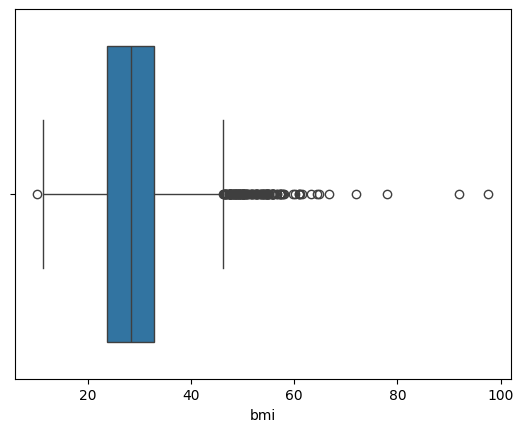

In [6]:
# Replace null values in 'BMI' with mean
mean_bmi = stroke_data['bmi'].mean()
stroke_data['bmi'] = stroke_data['bmi'].fillna(mean_bmi)

# Identify and handle outliers in 'BMI'
sns.boxplot(x=stroke_data['bmi'])
plt.show()

# Replace BMI outliers with mean
stroke_data.loc[stroke_data['bmi'] > stroke_data['bmi'].quantile(0.95), 'bmi'] = stroke_data['bmi'].mean()

##Step 4: Exploratory Data Analysis (EDA)

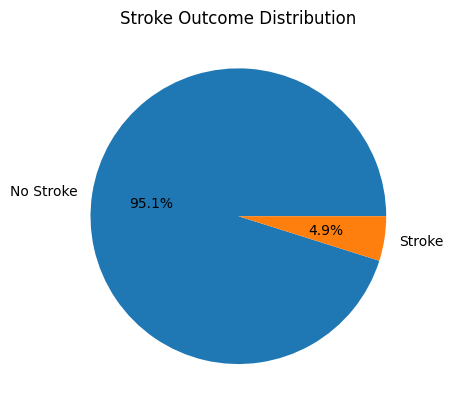

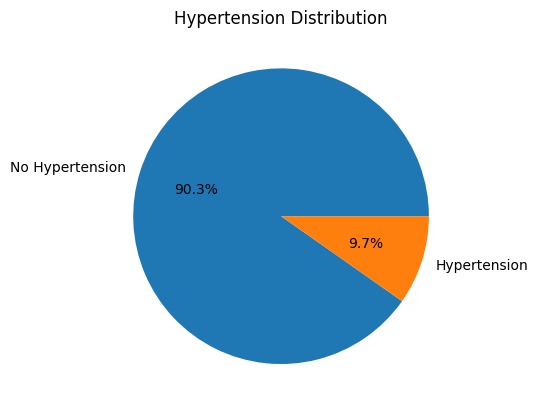

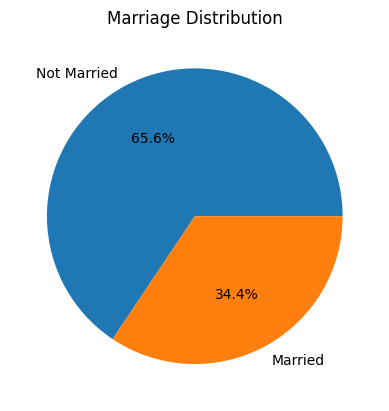

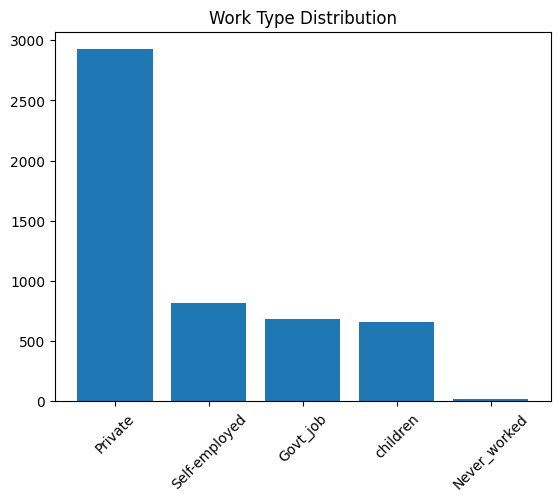

In [7]:
# Create pie chart for stroke outcome distribution
stroke_labels = ['No Stroke', 'Stroke']
stroke_counts = stroke_data['stroke'].value_counts()
plt.pie(stroke_counts, labels=stroke_labels, autopct='%1.1f%%')
plt.title('Stroke Outcome Distribution')
plt.show()

# Pie plot for hypertension feature
hypertension_labels = ['No Hypertension', 'Hypertension']
hypertension_counts = stroke_data['hypertension'].value_counts()
plt.pie(hypertension_counts, labels=hypertension_labels, autopct='%1.1f%%')
plt.title('Hypertension Distribution')
plt.show()

# Plot for marriage and work type
marriage_labels = ['Not Married', 'Married']
marriage_counts = stroke_data['ever_married'].value_counts()
plt.pie(marriage_counts, labels=marriage_labels, autopct='%1.1f%%')
plt.title('Marriage Distribution')
plt.show()

work_labels = stroke_data['work_type'].unique()
work_counts = stroke_data['work_type'].value_counts()
plt.bar(work_labels, work_counts)
plt.title('Work Type Distribution')
plt.xticks(rotation=45)
plt.show()

##Step 5: Encoding Categorical Variables

In [8]:
# Encode categorical variables into numerical ones
stroke_data['gender'] = stroke_data['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
stroke_data['ever_married'] = stroke_data['ever_married'].map({'No': 0, 'Yes': 1})
stroke_data['Residence_type'] = stroke_data['Residence_type'].map({'Urban': 0, 'Rural': 1})

##Step 6: One-Hot Encoding

In [9]:
# Apply one-hot encoding to 'work_type'
work_type_encoded = pd.get_dummies(stroke_data['work_type'], prefix='work_type')
stroke_data = pd.concat([stroke_data, work_type_encoded], axis=1)
stroke_data.drop('work_type', axis=1, inplace=True)

##Step 7: Label Encoding


In [10]:
# Apply label encoding to 'smoking_status'
label_encoder = LabelEncoder()
stroke_data['smoking_status'] = label_encoder.fit_transform(stroke_data['smoking_status'])

##Step 8: Correlation Analysis


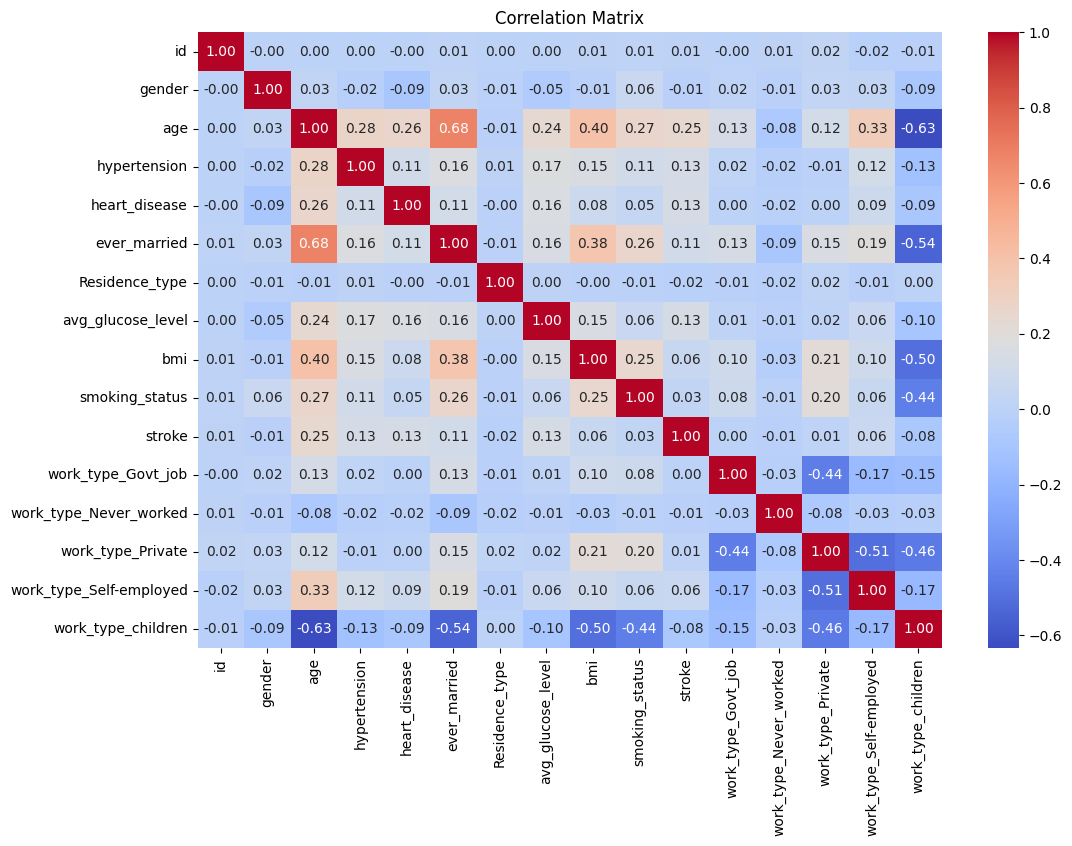

In [11]:
# Create correlation matrix and plot heatmap
correlation_matrix = stroke_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

##Step 9: Data Visualization


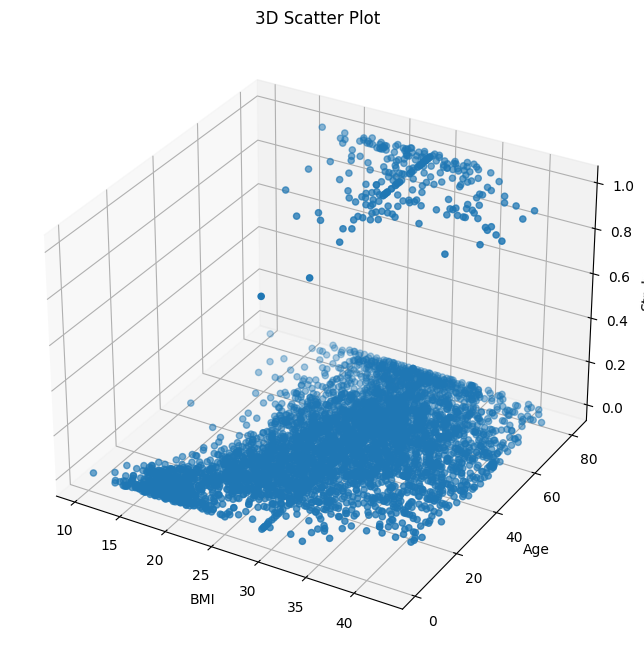

In [12]:
# 3D scatter plot for BMI, Stroke, and Age
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(stroke_data['bmi'], stroke_data['age'], stroke_data['stroke'])
ax.set_xlabel('BMI')
ax.set_ylabel('Age')
ax.set_zlabel('Stroke')
plt.title('3D Scatter Plot')
plt.show()

# Step 10: Apply PCA to reduce the number of features to 2

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(stroke_data.drop('stroke', axis=1))

# Step 11: Apply K-means with 3 clusters


In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_data)
cluster_labels = kmeans.predict(pca_data)
centroid = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Step 12: Scatter plot of data with K-means centers


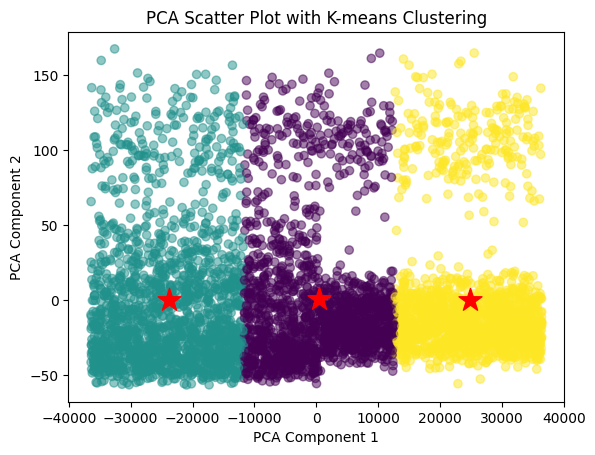

In [15]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(centroid[:, 0], centroid[:, 1], marker='*', c='red', s=300)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Scatter Plot with K-means Clustering')
plt.show()

##Conclusion
The analysis provided insights into the healthcare dataset, including data preprocessing steps, exploratory data analysis, and correlation analysis. These steps are crucial for understanding the data and preparing it for further analysis, such as clustering. The visualization techniques used helped in identifying patterns and understanding the relationships between variables.